### Question 1

A file of the stocks daily returns (Calculated as $\frac{P_{i+1}-P_{i}}{P_{i}}$) from January 4th 2016- December 28th 2017 is provided below. Please download this file to answer the questions.  

There are 23 stocks' daily returns from January 4th, 2016 to December 28th, 2017 from Yahoo Finance. Suppose these 23 stocks are the only risky assets available in the market. Please compute the mean daily returns of each stock, and the covariance matrix of those stocks' returns. Please enter the average daily return of Stock 'GE' from from January, 4th 2016 to December 28th, 2017. (Round to the fourth decimal place.)

In [1]:
# %pip install openpyxl


In [2]:
#%pip install cvxpy

In [3]:
import pandas as pd
import numpy as np
import openpyxl
import cvxpy as cp
from matplotlib import pyplot as plt

# URL of the Excel file
file_url = "FERM_3_Assignment_1.xlsx"

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_url, sheet_name='Daily_Returns_Q1_Q2')

# Set the 'date' column as the index
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# Calculate the mean daily returns for each stock
mean_daily_returns = df.mean()

# Calculate the covariance matrix of the stocks' returns
covariance_matrix = df.cov()

# Extract the average daily return of Stock 'GE'
ge_avg_daily_return = mean_daily_returns['GE']

# Print the average daily return of Stock 'GE'
print(f"{ge_avg_daily_return:.4f}")

-0.0011


### Question 2

Please enter the covariance between daily returns of IBM and GE from from January, 4th 2016 to December 28th, 2017. (Round to the sixth decimal place.)


In [4]:
# Extract the covariance between 'IBM' and 'GE'
covariance_ibm_ge = covariance_matrix.loc['IBM', 'GE']

# Print the covariance between 'IBM' and 'GE'
print(f"{covariance_ibm_ge:.6f}")


0.000047


### Question 3

Suppose we want to minimize the risk of the portfolio with the constraint that average daily return should be greater than or equal to 0.05%. i.e.:

$$
\begin{array}{ll}
\text{minimize} & x^TVx \\
\text{s.t.} & \mu^Tx \geq 0.0005 \\
& 1^Tx = 1
\end{array}
$$

Where $\mu$ is the daily return vector of the stocks, $x$ is the weight vector of stocks in the portfolio, and $V$ is the covariance matrix of the stocks' daily returns.

What is the optimal value?

Let $x_1$ be your optimal portfolio in this problem

&#9675; $5.143*10^{-5}$.

&#9675; $0.003617$.

&#9675; $0.005828$.

&#9679; $3.3*10^{-5}$.

In [5]:
# Define the number of assets
n = len(mean_daily_returns)

# Define the weights as a variable
x = cp.Variable(n)

# Define the constraints
constraints = [
    cp.sum(x) == 1,  # Weights sum to 1
    x >= 0,         # No short selling
    x @ mean_daily_returns >= 0.0005  # Target return
]

# Define the objective function
portfolio_variance = cp.quad_form(x, covariance_matrix.values)  # Use .values to convert DataFrame to NumPy array

# Define the problem
problem = cp.Problem(cp.Minimize(portfolio_variance), constraints)

# Solve the problem
problem.solve()

# Print the optimal portfolio variance and weights
print("Optimal Portfolio Variance:", problem.value)
print("Optimal Weights:", x.value)

Optimal Portfolio Variance: 3.5281547646196786e-05
Optimal Weights: [ 7.88274308e-02  3.04497058e-18  2.52405086e-02  3.05861265e-18
  3.81399457e-02  1.96877645e-02  7.49697949e-19  5.51252176e-02
  5.37249829e-02  2.49283239e-02  4.41913379e-19  2.00641749e-01
  4.72418477e-18  1.27944529e-01  2.25128120e-18 -3.95519600e-20
  2.06789904e-02  3.68816027e-02  3.77157221e-02  2.34902052e-01
  2.86424754e-02  1.29119670e-02  4.00673840e-03]


### Question 4


What is the expected return of the portfolio $x_1$ ? (Round your answer to the fourth decimal place.)

In [6]:
# Get the optimal weights
optimal_weights = x.value

# Calculate the expected return of the optimal portfolio
expected_return = optimal_weights @ mean_daily_returns

# Print the expected return, rounded to four decimal places
print(f"{expected_return:.4f}")

0.0005


### Question 5

Suppose we now want to change the previous constraint so that the average daily return should be greater than or equal to 0.08%.

What is the new optimal value of the problem? (Round your solution to the sixth decimal place.)

Let $x_2$ be your optimal portfolio in this problem.


In [7]:
# Define the constraints
constraints = [
    cp.sum(x) == 1,  # Weights sum to 1
    x >= 0,         # No short selling
    x @ mean_daily_returns >= 0.0008  # Target return changed to 0.08%
]

# Define the objective function
portfolio_variance = cp.quad_form(x, covariance_matrix.values)

# Define the problem
problem = cp.Problem(cp.Minimize(portfolio_variance), constraints)

# Solve the problem
problem.solve()

# Print the optimal portfolio variance
print(f"{problem.value:.6f}")

0.000043


### Question 6

Suppose we now want to change the previous constraint so that the average daily return should be greater than or equal to 0.1%.

Solve for the optimal solution $x_3$ by solving the mean variance problem.

Compute $z = \phi x_1 + (1-\phi)x_2$, where $\phi = \frac{0.08\% - 0.1\%}{0.08\% - 0.05\%}$

Compare $z$ and $x_3$, test two fund theorem: 




In [8]:
# --- Solve for x1 (0.05% return) ---
x1 = cp.Variable(n)
constraints1 = [
    cp.sum(x1) == 1,
    x1 >= 0,
    x1 @ mean_daily_returns >= 0.0005
]
portfolio_variance1 = cp.quad_form(x1, covariance_matrix.values)
problem1 = cp.Problem(cp.Minimize(portfolio_variance1), constraints1)
problem1.solve()
x1_optimal = x1.value

# --- Solve for x2 (0.08% return) ---
x2 = cp.Variable(n)
constraints2 = [
    cp.sum(x2) == 1,
    x2 >= 0,
    x2 @ mean_daily_returns >= 0.0008
]
portfolio_variance2 = cp.quad_form(x2, covariance_matrix.values)
problem2 = cp.Problem(cp.Minimize(portfolio_variance2), constraints2)
problem2.solve()
x2_optimal = x2.value

# --- Solve for x3 (0.1% return) ---
x3 = cp.Variable(n)
constraints3 = [
    cp.sum(x3) == 1,
    x3 >= 0,
    x3 @ mean_daily_returns >= 0.001
]
portfolio_variance3 = cp.quad_form(x3, covariance_matrix.values)
problem3 = cp.Problem(cp.Minimize(portfolio_variance3), constraints3)
problem3.solve()
x3_optimal = x3.value

# --- Calculate z ---
phi = (0.0008 - 0.001) / (0.0008 - 0.0005)
z = phi * x1_optimal + (1 - phi) * x2_optimal

# --- Compare z and x3 ---
# Need to normalize z so weights add to 1
z = z / np.sum(z)

# Test two fund theorem (using numpy's allclose for approximate comparison)
are_equal = np.allclose(z, x3_optimal)

print(f"Two-Fund Theorem: {'z == x3' if are_equal else 'z != x3'}")

Two-Fund Theorem: z != x3


### Question 7

By applying the two fund theorem, change $phi$ in the previous question, get portfolios $z = \phi x_1 + (1-\phi)x_2$ for different $phi$. 

Compute the average daily returns and portfolio variances when $\phi \in [-2,2]$, plot the Efficient Frontier like above.

Look at the graph, then give the approximate optimal return if we are given a risk tolerance that variance should be less than or equal to 0.000040. (Round your answer to the fourth decimal place.)

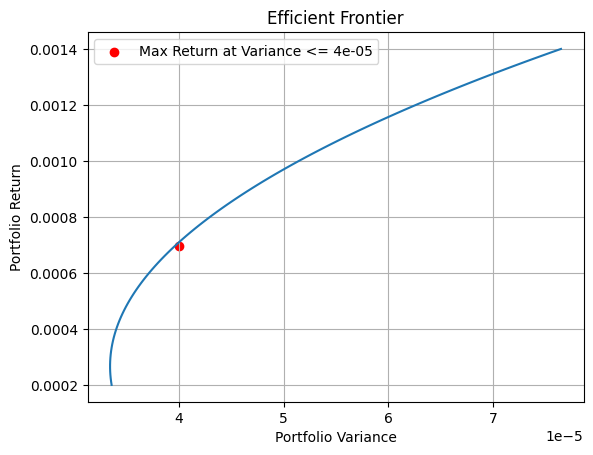

Approximate Optimal Return (Variance <= 0.000040): 0.0007


In [9]:
# --- Range of phi values ---
phi_values = np.linspace(-2, 2, 100)  # Create 100 points

# --- Store results for plotting ---
returns = []
variances = []

# --- Loop through phi values ---
for phi in phi_values:
    # --- Calculate z ---
    z = phi * x1_optimal + (1 - phi) * x2_optimal

    # --- Normalize z ---
    z = z / np.sum(z)

    # --- Calculate portfolio return and variance ---
    portfolio_return = z @ mean_daily_returns
    portfolio_variance = z.T @ covariance_matrix.values @ z

    returns.append(portfolio_return)
    variances.append(portfolio_variance)

# --- Plot the Efficient Frontier ---
plt.plot(variances, returns)
plt.xlabel("Portfolio Variance")
plt.ylabel("Portfolio Return")
plt.title("Efficient Frontier")
plt.grid(True)

# Highlight the point where variance <= 0.000040
variance_threshold = 0.000040
returns_at_threshold = [ret for var, ret in zip(variances, returns) if var <= variance_threshold]
if returns_at_threshold:
    max_return_at_threshold = max(returns_at_threshold)
    plt.scatter(variance_threshold, max_return_at_threshold, color='red', label=f'Max Return at Variance <= {variance_threshold}')
    plt.legend()

plt.show()

# --- Approximate optimal return ---
# Find the return closest to the variance threshold
variances = np.array(variances)
returns = np.array(returns)
index_at_threshold = np.argmin(np.abs(variances - variance_threshold))
approximate_optimal_return = returns[index_at_threshold]

print(f"Approximate Optimal Return (Variance <= 0.000040): {approximate_optimal_return:.4f}")

### Question 8

Which of the following portfolios are not achievable in practice?

![Efficient Frontier](image1.png)

&#9675; Portfolio A.

&#9675; Portfolio B.

&#9675; Portfolio C.

&#9679; Portfolio D.

### Question 9

Assume the risk free rate of daily return $r_f$ is $0.01\%$. We want to maximize the Sharpe ratio problem:

$$
\begin{array}{ll}
\text{maximize} & \frac{(\mu-r_f1)^Tx}{\sqrt{x^TVx}} \\
\text{subject to} & 1^Tx = 1
\end{array}
$$

The problem is now equivalent to maximize the return of unit risk, which is also called the market price of risk. We can rewrite maximization of the Sharpe ratio as minimizing the risk of unit return:

$$
\begin{array}{ll}
\text{minimize} & x^TVx \\
\text{subject to} & (\mu-r_f1)^Tx = 1
\end{array}
$$

Now the $x$ from the optimal solution is no longer the weight vector of our portfolio.

So our sharp portfolio should be:
$$
x_{Sharpe}^* = \frac{x}{1^Tx}
$$

Compute the Sharpe ratio for these stocks and round your answer to the third decimal place.

In [10]:
# Risk-free rate
rf = 0.0001

# Define the number of assets
n = len(mean_daily_returns)

# Convert pandas Series to numpy array
mean_returns_np = mean_daily_returns.values

# --- Define and solve the equivalent quadratic problem ---
x = cp.Variable(n)
gamma = cp.Parameter(nonneg=True)
gamma.value = 1.0  # Trade-off parameter

# Objective: minimize risk for given return
risk = cp.quad_form(x, covariance_matrix.values)
ret = mean_returns_np @ x

objective = cp.Minimize(risk)
constraints = [
    cp.sum(x) == 1,
    ret >= rf + gamma  # Target return constraint
]

problem = cp.Problem(objective, constraints)
problem.solve()

# --- Optimal Sharpe portfolio ---
x_sharpe = x.value

# --- Calculate Sharpe Ratio ---
portfolio_return = mean_returns_np @ x_sharpe - rf
portfolio_risk = np.sqrt(x_sharpe.T @ covariance_matrix.values @ x_sharpe)
sharpe_ratio_value = portfolio_return / portfolio_risk

print(f"Sharpe Ratio: {sharpe_ratio_value:.3f}")

Sharpe Ratio: 0.260


### Question 10

Can we realize the Sharpe portfolio calculated from the previous question as a long-only portfolio?

&#9675; Yes.

&#9679; No.